In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
dataset = pd.read_csv('csv_files/train.csv')

In [76]:
dataset

,Unnamed: 0,id,stmt_date,HQ_city,legal_struct,ateco_sector,def_date,fs_year,asst_intang_fixed,asst_tang_fixed,...,inc_extraord,taxes,profit,days_rec,ebitda,roa,roe,wc_net,margin_fin,cf_operations
0,17,520288,2011-12-31,28.0,SRL,14.0,NaT,2011,67537.0,1137566.0,...,-309.0,-80959.0,-81288.0,NaN,6318.0,-3.81,-28.03,496258.0,-917029.0,-849.0
1,18,520288,2008-12-31,28.0,SRL,14.0,NaT,2008,256438.0,1181416.0,...,-678.0,-94622.0,-107382.0,NaN,46088.0,-2.76,NaN,97952.0,NaN,-3881.0
2,19,520288,2009-12-31,28.0,SRL,14.0,NaT,2009,194046.0,1152014.0,...,4224.0,-74235.0,-77819.0,NaN,67611.0,-2.17,NaN,-210671.0,NaN,32618.0
3,21,520288,2012-12-31,28.0,SRL,14.0,NaT,2012,15195.0,1116938.0,...,3634.0,-250786.0,-250786.0,NaN,-161478.0,-12.99,NaN,367892.0,-1094962.0,-168907.0
4,22,520288,2007-12-31,28.0,SRL,14.0,NaT,2007,126603.0,1127807.0,...,820.0,92192.0,36733.0,NaN,153060.0,6.20,52.43,-317007.0,-1184970.0,80039.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023547,4885791,92001230520,2011-12-31,52.0,SPA,93.0,NaT,2011,1498628.0,248233.0,...,-2.0,85977.0,-268445.0,-15.33,984567.0,2.16,-43.00,204689.0,-1286111.0,550755.0
1023548,4885792,92001230520,2008-12-31,52.0,SPA,93.0,NaT,2008,2465065.0,343015.0,...,15339.0,356795.0,6467.0,23.01,1746442.0,12.97,1.01,-472335.0,-2212557.0,945705.0
1023549,4885793,92001230520,2007-12-31,52.0,SPA,93.0,NaT,2007,2375606.0,261775.0,...,117032.0,168871.0,3893.0,33.64,1539957.0,6.15,0.62,-78424.0,-2033489.0,1166064.0
1023550,4885815,94111750108,2010-12-31,10.0,SRL,68.0,NaT,2010,2973.0,1131586.0,...,0.0,-4793.0,-4793.0,NaN,-4795.0,-0.31,-1.85,148203.0,-1140392.0,-4793.0


In [77]:
dataset['stmt_date'] = pd.to_datetime(dataset['stmt_date'], format="%Y-%m-%d")
dataset['def_date'] = pd.to_datetime(dataset['def_date'], format="%d/%m/%Y")

In [78]:
def default_check(data):
  prediction_window_start = data['stmt_date'] + pd.DateOffset(months = 6)
  prediction_window_end = data['stmt_date'] + pd.DateOffset(years = 1, months = 6)
  if pd.isnull(data['def_date']):
    return 0
  data['def_date'] = pd.to_datetime(data['def_date'])
  if data['def_date'] >= prediction_window_start and data['def_date'] < prediction_window_end:
    return 1
  return 0
dataset['Default'] = dataset.apply(default_check, axis=1)

In [79]:
dataset.columns

Index(['Unnamed: 0', 'id', 'stmt_date', 'HQ_city', 'legal_struct',
       'ateco_sector', 'def_date', 'fs_year', 'asst_intang_fixed',
       'asst_tang_fixed', 'asst_fixed_fin', 'asst_current', 'AR',
       'cash_and_equiv', 'asst_tot', 'eqty_tot', 'eqty_corp_family_tot',
       'liab_lt', 'liab_lt_emp', 'debt_bank_st', 'debt_bank_lt', 'debt_fin_st',
       'debt_fin_lt', 'AP_st', 'AP_lt', 'debt_st', 'debt_lt', 'rev_operating',
       'COGS', 'prof_operations', 'goodwill', 'inc_financing', 'exp_financing',
       'prof_financing', 'inc_extraord', 'taxes', 'profit', 'days_rec',
       'ebitda', 'roa', 'roe', 'wc_net', 'margin_fin', 'cf_operations',
       'Default'],
      dtype='object')

# Z- score for private companies

Altman Z Score = (0.717 x A) + (0.847 x B) + (3.107 x C) + (0.420 x D) + (0.998 x E)
where

A = (Working Capital) / Total Assets

B = Retained Earnings / Total Assets

C = Earnings Before Interest and Taxes / Total Assets

D = Book Value of Equity / Total Liabilities

E = Sales / Total Assets

In [141]:
A = dataset['wc_net']/dataset['asst_tot']

B = dataset['profit']/dataset['asst_tot']

C = dataset['ebitda']/dataset['asst_tot']

# Check if the denominator is zero
denominator = dataset['asst_tot'] - dataset['eqty_tot']
D = dataset['eqty_tot'] / denominator.where(denominator != 0, 1000)
#D = np.where(dataset['asst_tot'] - dataset['eqty_tot'] == 0, 3, D)

E = dataset['rev_operating']/dataset['asst_tot']

#Z_Score = 1.2*A + 1.4*B + 3.3*C + 0.6*D + 1.0*E

Z_Score = (0.717 * A) + (0.847 * B) + (3.107 * C) + (0.420 * D) + (0.998 * E)

dataset['Z_Score'] = Z_Score

In [28]:
max(Z_Score)

354973.7863188564

In [29]:
Z_Score.sort_values()

179881    -4.467987e+06
179882    -4.467763e+06
191241    -1.234100e+05
471739    -4.058689e+03
570771    -1.671825e+03
               ...     
1005137             NaN
1008813             NaN
1012932             NaN
1012934             NaN
1020681             NaN
Length: 1023552, dtype: float64

In [30]:
import pandas as pd

# Assuming you have a variable Z_Score
# Use the isna() function to check for missing values
missing_values = Z_Score.isna()

# Calculate the percentage of missing values
percentage_missing = (missing_values.sum() / len(Z_Score)) * 100

print(f"Percentage of missing values in Z_Score: {percentage_missing:.2f}%")


Percentage of missing values in Z_Score: 0.02%


Text(0.5, 1.0, 'Histogram of Z-Scores (Score > -10 or < -10)')

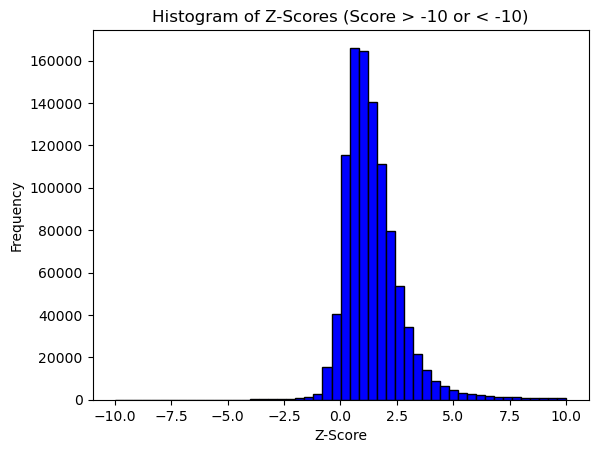

In [31]:
filtered_Z_Score = Z_Score[(Z_Score > -10) & (Z_Score < 10)]

# Set the number of bins for the histogram
num_bins = 50  # You can adjust this based on your data and preferences

# Create the histogram
plt.hist(filtered_Z_Score, bins=num_bins, color='blue', edgecolor='black')

# Add labels and a title to the plot
plt.xlabel("Z-Score")
plt.ylabel("Frequency")
plt.title("Histogram of Z-Scores (Score > -10 or < -10)")

Text(0.5, 1.0, 'Histogram of Z-Scores (Score > -10 or < -10)')

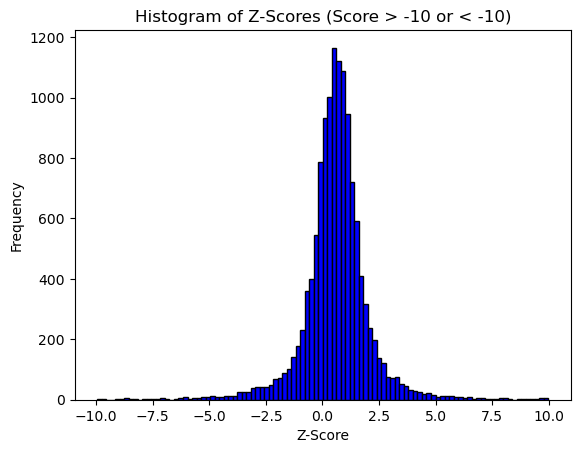

In [32]:
def_data = dataset[dataset['Default']==1]
Z_Score = def_data['Z_Score']
filtered_Z_Score = Z_Score[(Z_Score > -10) & (Z_Score < 10)]
z_def=Z_Score
# Set the number of bins for the histogram
num_bins = 100  # You can adjust this based on your data and preferences

# Create the histogram
plt.hist(filtered_Z_Score, bins=num_bins, color='blue', edgecolor='black')

# Add labels and a title to the plot
plt.xlabel("Z-Score")
plt.ylabel("Frequency")
plt.title("Histogram of Z-Scores (Score > -10 or < -10)")

Text(0.5, 1.0, 'Histogram of Z-Scores (Score > -10 or < -10)')

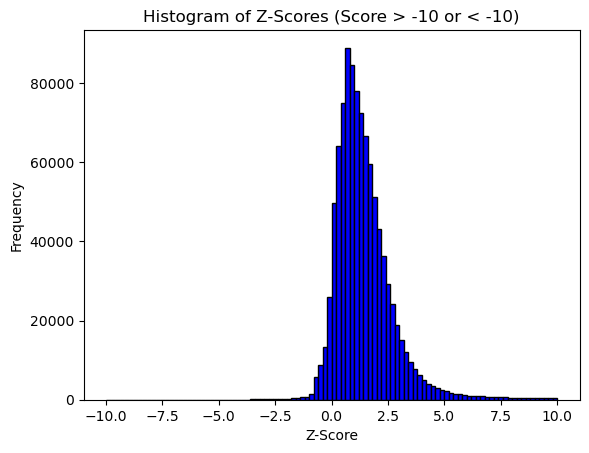

In [36]:
def_data = dataset[dataset['Default']==0]
Z_Score = def_data['Z_Score']
filtered_Z_Score = Z_Score[(Z_Score > -10) & (Z_Score < 10)]
z_nodef=Z_Score
# Set the number of bins for the histogram
num_bins = 100  # You can adjust this based on your data and preferences

# Create the histogram
plt.hist(filtered_Z_Score, bins=num_bins, color='blue', edgecolor='black')

# Add labels and a title to the plot
plt.xlabel("Z-Score")
plt.ylabel("Frequency")
plt.title("Histogram of Z-Scores (Score > -10 or < -10)")

In [33]:
buckets = [-float("inf"), -3, -2, -1, 0, 1, 2, 3, float("inf")]
labels = ['(-inf,-3)', '(-3,-2)', '(-2,-1)', '(-1,0)', '(0,1)', '(1,2)', '(2,3)', '(3,inf)']

z_def1 = pd.cut(z_def, bins=buckets, labels=labels)
z_def1
category_counts1 = z_def1.value_counts()

In [34]:
import pandas as pd

# Assuming you have a Series 'z_def'
# Define the number of quantiles you want to create
num_quantiles = 10  # Adjust this to the number of quantiles you desire

# Use qcut to create quantiles with labels
z_def_quantiles = pd.qcut(z_def, q=num_quantiles, labels=[f'Q{i}' for i in range(1, num_quantiles + 1)])

# Calculate the count of each quantile
quantile_counts = z_def_quantiles.value_counts()

# Print the quantile labels and counts
print("Quantile Labels and Counts:")
print(quantile_counts)


Quantile Labels and Counts:
Q1     1318
Q4     1318
Q7     1318
Q10    1318
Q2     1317
Q3     1317
Q5     1317
Q6     1317
Q8     1317
Q9     1317
Name: Z_Score, dtype: int64


In [37]:
buckets = [-float("inf"), -3, -2, -1, 0, 1, 2, 3, float("inf")]
labels = ['(-inf,-3)', '(-3,-2)', '(-2,-1)', '(-1,0)', '(0,1)', '(1,2)', '(2,3)', '(3,inf)']
z_def2 = pd.cut(z_nodef, bins=buckets, labels=labels)
z_def2
category_counts2 = z_def2.value_counts()

In [39]:
category_counts2

(0,1)        361856
(1,2)        327971
(2,3)        151836
(3,inf)      110009
(-1,0)        54655
(-2,-1)        2325
(-inf,-3)       770
(-3,-2)         727
Name: Z_Score, dtype: int64

In [40]:
result = pd.merge(category_counts2, category_counts1, left_index=True, right_index=True, how='left')
result

,Z_Score_x,Z_Score_y
"(0,1)",361856,5331
"(1,2)",327971,3027
"(2,3)",151836,772
"(3,inf)",110009,686
"(-1,0)",54655,2265
"(-2,-1)",2325,572
"(-inf,-3)",770,281
"(-3,-2)",727,240


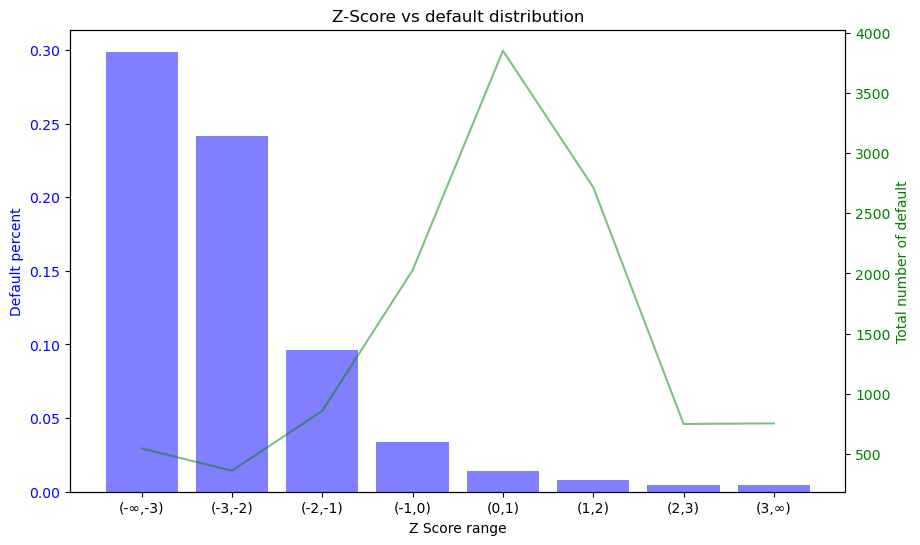

In [41]:
import matplotlib.pyplot as plt

# Data
ranges = ['(-∞,-3)', '(-3,-2)', '(-2,-1)', '(-1,0)', '(0,1)', '(1,2)', '(2,3)', '(3,∞)']
Z_Score_x = [1277, 1129, 8051, 57741, 273248, 347588, 168754, 153677]
Z_Score_y = [544, 359, 857, 2027, 3853, 2717, 748, 753]
Z_Score_x = np.array(Z_Score_y)/(np.array(Z_Score_x) + np.array(Z_Score_y))

# Create a figure and two subplots with shared x-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Z_Score_x on the first subplot (y1-axis)
ax1.bar(ranges, Z_Score_x, color='b', alpha=0.5, label='Default percent')
ax1.set_xlabel('Z Score range')
ax1.set_ylabel('Default percent', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for Z_Score_y
ax2 = ax1.twinx()
ax2.plot(ranges, Z_Score_y, color='g', alpha=0.5, label='Total number of default')
ax2.set_ylabel('Total number of default', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Labeling and legend
plt.title('Z-Score vs default distribution')
plt.show()


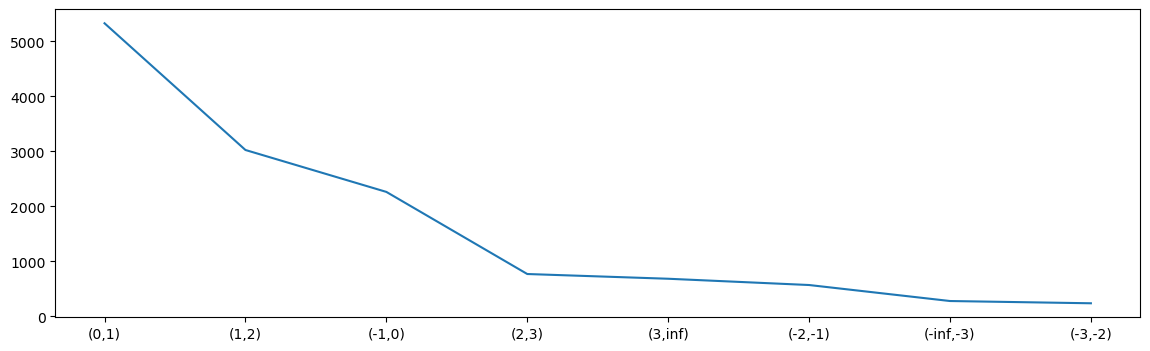

In [42]:
plt.figure(figsize=(14, 4))
plt.plot(category_counts1)

In [43]:
from sklearn.metrics import roc_curve, confusion_matrix, auc
fpr=[]
tpr=[]
for i in np.arange(-20, 20, 0.2):
    y_pred = (dataset['Z_Score']<i).astype(int)
    y=dataset['Default']
    confusion = confusion_matrix(y, y_pred)

    # Extract TP, FP, TN, FN
    TP = confusion[1, 1]
    FP = confusion[0, 1]
    TN = confusion[0, 0]
    FN = confusion[1, 0]

    # Calculate FPR and TPR
    FPR = FP / (FP + TN)
    TPR = TP / (TP + FN)
    fpr.append(FPR)
    tpr.append(TPR)

    

In [44]:
auc(fpr, tpr)

0.6659899696748963

In [45]:
tpr.append(1)
fpr.append(1)

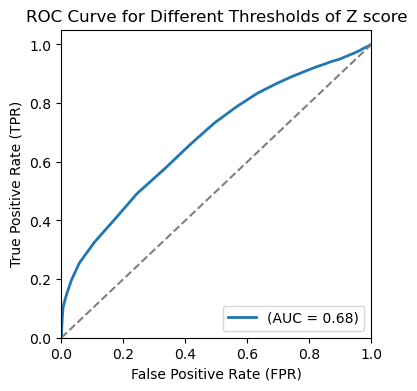

In [47]:
AUC = auc(fpr, tpr)
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, lw=2, label=f'(AUC = {AUC:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Different Thresholds of Z score')
plt.legend(loc='lower right')
plt.show()

In [48]:
dataset.columns

Index(['Unnamed: 0', 'id', 'stmt_date', 'HQ_city', 'legal_struct',
       'ateco_sector', 'def_date', 'fs_year', 'asst_intang_fixed',
       'asst_tang_fixed', 'asst_fixed_fin', 'asst_current', 'AR',
       'cash_and_equiv', 'asst_tot', 'eqty_tot', 'eqty_corp_family_tot',
       'liab_lt', 'liab_lt_emp', 'debt_bank_st', 'debt_bank_lt', 'debt_fin_st',
       'debt_fin_lt', 'AP_st', 'AP_lt', 'debt_st', 'debt_lt', 'rev_operating',
       'COGS', 'prof_operations', 'goodwill', 'inc_financing', 'exp_financing',
       'prof_financing', 'inc_extraord', 'taxes', 'profit', 'days_rec',
       'ebitda', 'roa', 'roe', 'wc_net', 'margin_fin', 'cf_operations',
       'Z_Score', 'Default'],
      dtype='object')

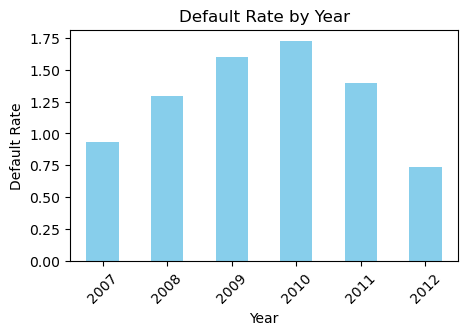

In [59]:
import matplotlib.ticker as FuncFormatter

default_rate_by_year = dataset.groupby('fs_year')['Default'].mean()*100

# Function to format y ticks
def multiply_by_100(x, pos):
    return f'{x * 100:.0f}%'

# Plotting
plt.figure(figsize=(5, 3))
ax = default_rate_by_year.plot(kind='bar', color='skyblue')


plt.title('Default Rate by Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

In [51]:
dataset['Default'].mean()

0.012876727318201713

In [63]:
len(dataset[dataset['Default']==1]['id'].unique())

13180

In [64]:
len(dataset[dataset['Default']==1])

13180

In [65]:
df=dataset[dataset['Default']==1]

In [66]:
len(df['id'].unique())

13180

In [150]:
y_actual = df['Default']

In [151]:
len(y_actual)

370612

In [149]:
df = dataset[dataset['fs_year'] >= 2011]

In [152]:
y_pred = pd.read_csv('csv_files/pds.csv')
y_pred = y_pred[dataset['fs_year'] >= 2011]

In [153]:
len(y_pred)

370612

In [163]:
len(dataset)

1023552

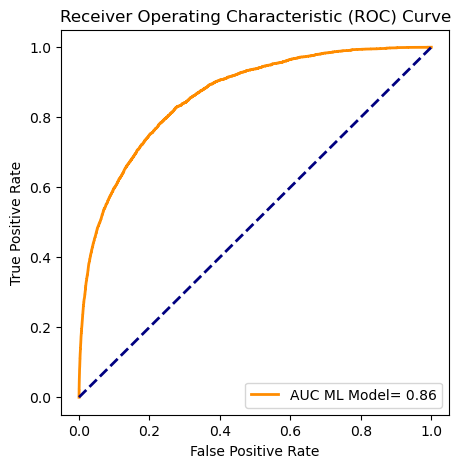

In [154]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_red contains predicted probabilities and y_actual contains actual labels (0 or 1)
fpr, tpr, thresholds = roc_curve(y_actual, y_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC ML Model= {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [157]:
fpr1, tpr1, thresholds1 = roc_curve(y_actual, y_pred)

In [158]:
from sklearn.metrics import roc_curve, confusion_matrix, auc
fpr=[]
tpr=[]
for i in np.arange(-20, 20, 0.2):
    y_pred = (df['Z_Score']<i).astype(int)
    y=df['Default']
    confusion = confusion_matrix(y, y_pred)

    # Extract TP, FP, TN, FN
    TP = confusion[1, 1]
    FP = confusion[0, 1]
    TN = confusion[0, 0]
    FN = confusion[1, 0]

    # Calculate FPR and TPR
    FPR = FP / (FP + TN)
    TPR = TP / (TP + FN)
    fpr.append(FPR)
    tpr.append(TPR)

    

In [159]:
auc(fpr, tpr)

0.6771167792515188

In [160]:
tpr.append(1)
fpr.append(1)

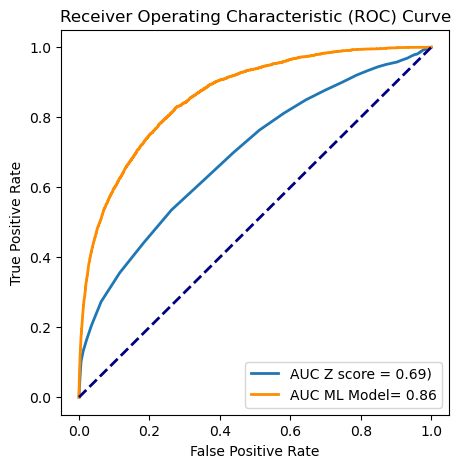

In [162]:
AUC = auc(fpr, tpr)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, lw=2, label=f'AUC Z score = {AUC:.2f})')


plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'AUC ML Model= {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()